## 빅데이터 실습

### 제주도 핫플레이스 웹크롤링

#### 셀레니움 사용

In [ ]:
# 셀레니움 사용등록
from selenium import webdriver
import time

In [ ]:
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import unicodedata # 유니코드 데이터 처리 모듈
import re # 정규식 처리모듈

In [ ]:
driver = webdriver.Chrome()

In [ ]:
# 인스타그램 접속
driver.get('http://www.instagram.com')
time.sleep(2.0)

In [ ]:
# 인스타그램 사용자 이름 정보 입력
email = ''
input_id = driver.find_element(By.NAME, 'username')
input_id.clear()
input_id.send_keys(email)

password = ''
input_pw = driver.find_element(By.NAME, 'password')
input_pw.clear()
input_id.send_keys(password)
input_pw.submit()
time.sleep(2.0)

In [ ]:
## 검색결과 URL 함수
def searchInstagram(word):
    url = f'{word}'
    return url

In [ ]:
## 24.03. 현재 태그로는 30개 이상 검색 안됨
driver.get('http://www.instagram.com/jeju__nadri/')

##### 게시글 클릭 후 게시글 정보 가져오기

In [ ]:
first = driver.find_elements(By.CLASS_NAME, '_aagw')[0]
first.click()
time.sleep(2.0)

In [ ]:
## 게시글 정보 가져오기 함수
def getContent(driver):
    pass

In [ ]:
## 게시글 가져오기 로직
## 1. HTML 코드 가져오기
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

## 2. 팝업 본문내용 가게명 가져오기
content = soup.select('div._a9zr>div>h1')[0].text

firstIndex = str(soup.select('div._a9zr>div>h1')[0]).index('>')
lastIndex = str(soup.select('div._a9zr>div>h1')[0]).index('<br/>')
shopName = str(soup.select('div._a9zr>div>h1')[0])[firstIndex:lastIndex+1]

## 3. 본문 내용에서 해시태그 가져오기(정규식 활용)
tags = re.findall(r'#[^\s#,\\]+', content)
tags

## 4. vhtmxm wkrtjddlfwk
date = soup.select('time.x1p4m5qa')[0]['datetime'][:10]
date

## 5. 좋아요 수 가져오기
like = soup.select('span.xdj266r.x11i5rnm.x1vvkbs')[3].text
like

## 6. 위치정보
re.findall(r'(\w+[시]\ㄴ*)?', content)

##### 현재 문제
- 인스타그램 화면 UI가 두 종류, 통일해서 코딩 불가

#### 워드 클라우드
- 태그 중에서 빈도수가 높은 태그는 글자를 크게, 빈도수가 낮은 태그는 작게 표현해서 마치 구름처럼 나타내는 방법

In [1]:
## 판다스 등 필요 라이브러리 사용등록
import pandas as pd

In [2]:
raw_total = pd.read_excel('./data/1_crawling_raw.xlsx')
raw_total['tags'][32][2:-2].split("', '")

['']

In [3]:
## tqdm 모듈 사용
from tqdm import tqdm

In [4]:
tagAllList = []

for tags in tqdm(raw_total['tags']): #8800개 반복
    tagList = tags[2:-2].split("', '") # 다시 리스트로
    for tag in tagList: # 갯수가 유동적
        tagAllList.append(tag)

100%|██████████| 8801/8801 [00:00<00:00, 179712.71it/s]


In [5]:
len(tagAllList)

149495

In [6]:
## 해시태그 출현 빈도 집계
from collections import Counter

In [7]:
tagCounts = Counter(tagAllList)

In [8]:
tagCounts.most_common(50)

[('#제주맛집', 3750),
 ('#제주도맛집', 3467),
 ('#제주여행', 3204),
 ('#제주관광', 2898),
 ('#제주도', 2096),
 ('#제주', 1567),
 ('#제주도여행', 1555),
 ('#서귀포맛집', 1392),
 ('#제주도가볼만한곳', 1047),
 ('#서귀포', 872),
 ('#제주핫플레이스', 848),
 ('#jeju', 776),
 ('#제주흑돼지맛집', 730),
 ('#제주맛집추천', 728),
 ('#일상', 717),
 ('#제주도흑돼지', 713),
 ('#제주카페', 711),
 ('#제주도흑돼지맛집', 709),
 ('#제주흑돼지', 693),
 ('#협재맛집', 677),
 ('#성산일출봉', 674),
 ('#제주도민', 637),
 ('#제주도그램', 609),
 ('#서귀포흑돼지맛집', 605),
 ('', 588),
 ('#서귀포흑돼지', 582),
 ('#제주가볼만한곳', 580),
 ('#성산일출봉맛집', 567),
 ('#섭지코지', 558),
 ('#제주도민맛집', 542),
 ('#제주핫플', 530),
 ('#선팔', 522),
 ('#섭지코지맛집', 519),
 ('#제주살이', 516),
 ('#여행스타그램', 498),
 ('#통갈치구이', 495),
 ('#제주통갈치구이', 485),
 ('#제주서귀포맛집', 479),
 ('#제주반영구', 478),
 ('#중문맛집', 472),
 ('#제주눈썹문신', 472),
 ('#제주도관광', 471),
 ('#서귀포눈썹문신', 458),
 ('#여행', 455),
 ('#먹스타그램', 453),
 ('#제주시', 451),
 ('#반영구', 443),
 ('#눈썹문신', 443),
 ('#제주자연눈썹', 435),
 ('#제주속눈썹', 435)]

In [9]:
## 맛집 이외의 해시태그는 제외, 워드클라우드 결과 확인 후 다시 필요없는 해시태그 추가, 정제한 뒤
STOPWORDS = ['#제주도', '#제주', '#jeju', '#제주시', '#일상', '#제주도민', '#반영구', '#눈썹문신', 
             '#제주자연눈썹', '#제주속눈썹', '', '#서귀포', '#제주도그램', '#선팔', '#제주살이', '#여행스타그램',
             '#제주반영구', '#제주눈썹문신', '#서귀포눈썹문신', '#서귀포남자눈썹문신', '#서귀포자연눈썹',
             '#제주남자눈썹문신', '#서귀포속눈썹', '#서귀포반영구', '#제주스타그램', '#소통', '#맞팔', '#제주메이크업',
             '#daily', '#가족여행', '#jejuisland', '#제주속눈썹연장', '#제주해안도로', '#셀카', '#제주공항',
             '#서귀포문신', '#데일리', '#제주문신']

tagFilterList = []
for tag in tagAllList:
    if tag not in STOPWORDS: # 제외시킬 단어에 속하지 않으면
        tagFilterList.append(tag)

In [10]:
from itertools import count


tagFilterCounts = Counter(tagFilterList)
tagFilterCounts.most_common(50)

[('#제주맛집', 3750),
 ('#제주도맛집', 3467),
 ('#제주여행', 3204),
 ('#제주관광', 2898),
 ('#제주도여행', 1555),
 ('#서귀포맛집', 1392),
 ('#제주도가볼만한곳', 1047),
 ('#제주핫플레이스', 848),
 ('#제주흑돼지맛집', 730),
 ('#제주맛집추천', 728),
 ('#제주도흑돼지', 713),
 ('#제주카페', 711),
 ('#제주도흑돼지맛집', 709),
 ('#제주흑돼지', 693),
 ('#협재맛집', 677),
 ('#성산일출봉', 674),
 ('#서귀포흑돼지맛집', 605),
 ('#서귀포흑돼지', 582),
 ('#제주가볼만한곳', 580),
 ('#성산일출봉맛집', 567),
 ('#섭지코지', 558),
 ('#제주도민맛집', 542),
 ('#제주핫플', 530),
 ('#섭지코지맛집', 519),
 ('#통갈치구이', 495),
 ('#제주통갈치구이', 485),
 ('#제주서귀포맛집', 479),
 ('#중문맛집', 472),
 ('#제주도관광', 471),
 ('#여행', 455),
 ('#먹스타그램', 453),
 ('#제주일상', 424),
 ('#애월맛집', 410),
 ('#제주시맛집', 387),
 ('#카멜리아힐', 384),
 ('#중문흑돼지맛집', 377),
 ('#제주도여행코스', 361),
 ('#제주도카페', 354),
 ('#성산맛집', 342),
 ('#좋아요', 318),
 ('#서귀포맛집추천', 315),
 ('#첫줄', 311),
 ('#한림맛집', 308),
 ('#제주공항근처맛집', 307),
 ('#제주공항맛집', 275),
 ('#오설록', 247),
 ('#제주도맛집추천', 246),
 ('#제주도이색맛집', 240),
 ('#서귀포여행', 238),
 ('#서귀포카페', 233)]

##### 시각화

In [11]:
# 시각화 라이브러리 사용등록
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# 한글 깨짐 문제 해결
from matplotlib import rcParams, font_manager, rc

font_path  = 'C:/Windows/Fonts/NanumGothicCoding.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

In [13]:
# 차트 스타일 지정
sns.set_style('darkgrid')

In [14]:
dfTagCounts = pd.DataFrame(tagFilterCounts.most_common(30))

In [15]:
dfTagCounts.columns = ['tags', 'counts']

In [16]:
## 불필요한 경고메시지 제거
import warnings
warnings.filterwarnings('ignore')

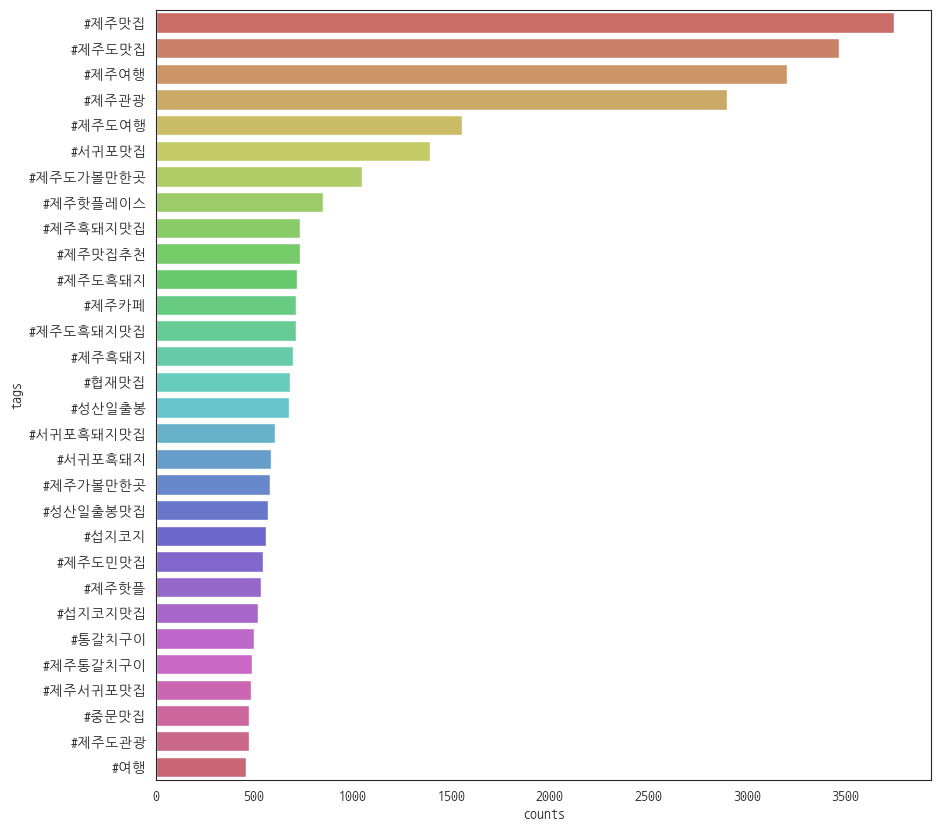

In [48]:
## 막대 차트
plt.figure(figsize=(10,10))
## palette 종류 : 'pastel', 'husl', 'hls', 'set2, 'paired', 'mako'
sns.barplot(x='counts', y= 'tags', data=dfTagCounts, palette='hls')
plt.show()

In [ ]:
!pip install wordcloud

In [18]:
# 워드 클라우드 라이브러리 사용등록
from wordcloud import WordCloud

In [19]:
import platform

if platform.system() == 'Windows':
    fontPath = 'C:/Windows/Fonts/경기천년제목V_Bold.ttf'
elif platform.system() == 'Darwin': #MacOS
    fontPath = '/Users/$USER/Library/Fonts/경기천년제목V_Bold.ttf'

In [20]:
import numpy as np
from PIL import Image, ImageOps

In [42]:
sns.set_style('white')

##### 글자체 변경
- 경기천년체 https://www.gg.go.kr/contents/contents.do?ciIdx=679&menuId=2457

In [39]:
# 폰트 경로 변경
if platform.system() == 'Windows':
    fontPath = 'C:/Windows/Fonts/경기천년제목V_Bold.ttf'
elif platform.system() == 'Darwin': #MacOS
    fontPath = '/Users/$USER/Library/Fonts/경기천년제목_Bold.ttf'

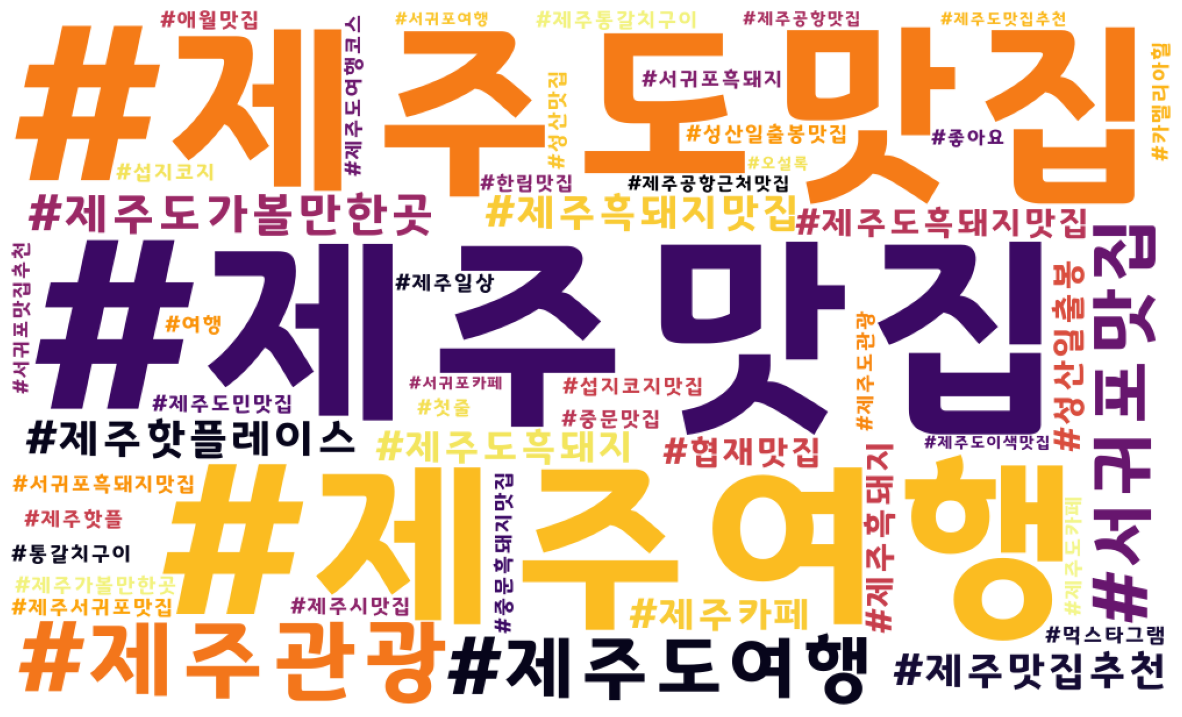

In [49]:
# 워드클라우드 다시
tagsLast = dict(tagFilterCounts.most_common(50))

mask = np.array(Image.open('./data/cloud.png'))
mask[mask.sum(axis=2)==0]=255

wc= WordCloud(font_path=fontPath, colormap='inferno',
              relative_scaling= 0.4, width=1000, height=600,
              background_color='white').generate_from_frequencies(tagsLast)
plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.axis('off')# x,y좌표 숨김
plt.show()

#### 지도 시각화
- Folium 사용

##### 주소에 대한 위경도 값 가져오기
- 카카오 검색 API 사용
